### Translation

In [1]:
import numpy as np
import cv2 as cv

In [2]:
image = cv.imread("../DATA/colors.jpg")
cv.imshow("Original" , image)
cv.waitKey(0)

113

In [ ]:
M = np.float32([
    [1,0,25],
    [0,1,50]
])
shifted = cv.warpAffine(image, M, (image.shape[1],image.shape[0]))
cv.imshow("Shifted down and right", shifted)
cv.waitKey(0)


In [ ]:
M = np.float32([
    [1,0,-25],
    [0,1,-50]
])
shifted = cv.warpAffine(image, M, (image.shape[1],image.shape[0]))
cv.imshow("Shifted up and left", shifted)
cv.waitKey(0)

In [50]:
def translate_image(image, x, y):
    M = np.float32([[1,0,x], [0,1,y]])
    shifted = cv.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

In [ ]:
shited = translate_image(image, -50, 90 )
cv.imshow("Shifted", shifted)
cv.waitKey(0)

### Rotation

In [ ]:
(h,w) = image.shape[:2]
center = w//2 , h//2 
M = cv.getRotationMatrix2D(center, 45, 0.5)
rotated = cv.warpAffine(image, M, (w,h))
cv.imshow("Rotated by 45 degrees" , rotated)
cv.waitKey(0)

In [ ]:
### Write a function for rotation

### Resizing

In [ ]:
h = image.shape[0]
w = image.shape[1]
r = 50.0 / h 
print(r)
dim = (int(w*r), 50) # (h,w)
resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)
cv.imshow("Resized (Height)", resized)
cv.waitKey(0)

In [18]:
import imutils 

In [ ]:
resized = imutils.resize(image, height = 100)
cv.imshow("Resized with Imtuils" , resized)
cv.waitKey(0)

In [ ]:
### Write a function called display_image

### Flipping

In [ ]:
flipped = cv.flip(image, 1 )
cv.imshow("Flipped horizontally" , flipped)
cv.waitKey(0)

In [ ]:
flipped = cv.flip(image, 0 )
cv.imshow("Flipped Vertically" , flipped)
cv.waitKey(0)

In [ ]:
flipped = cv.flip(image, -1 )
cv.imshow("Flipped horizontally and Vertically" , flipped)
cv.waitKey(0)

### Cropping 

In [ ]:
cropped = image[30:120, 240:335]
cv.imshow("Cropped" , cropped)
cv.waitKey(0)

### Arithmetics

In [ ]:
M = np.ones(image.shape, dtype="uint8")*2
subtracted = cv.subtract(image, M )
cv.imshow("Subtracted" , subtracted)
cv.waitKey(0)

In [ ]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv.imshow("Rectangle", rectangle)

circle = np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
cv.imshow("Circle", circle)

cv.waitKey(0)

### Bitwise operations

In [ ]:
bitwiseAnd = cv.bitwise_and(rectangle, circle)
cv.imshow("And" , bitwiseAnd)
cv.waitKey(0)

In [ ]:
bitwiseOr = cv.bitwise_or(rectangle, circle)
cv.imshow("Or" , bitwiseAnd)
cv.waitKey(0)

In [ ]:
bitwiseOr = cv.bitwise_xor(rectangle, circle)
cv.imshow("xOr" , bitwiseAnd)
cv.waitKey(0)

In [ ]:
bitwiseOr = cv.bitwise_not(rectangle, circle)
cv.imshow("Not" , bitwiseAnd)
cv.waitKey(0)

### Masking

In [4]:
mask = np.zeros(image.shape[:2], dtype="uint8")
(cX, cY) = image.shape[1] //2 , image.shape[0] // 2 
cv.rectangle(mask, (cX - 75, cY-75) , (cX + 75 , cY + 75) , 255 , -1)
cv.imshow("Mask" , mask)
cv.waitKey(0)

13

In [5]:
masked_image = cv.bitwise_and(image, image , mask=mask )
cv.imshow("Masked image" , masked_image)
cv.waitKey(0)

113

### Color Spaces

In [7]:

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
cv.imshow("HSV", hsv)

lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
cv.imshow("L*a*b*", lab)
cv.waitKey(0)

113

### Histograms


In [9]:
import matplotlib.pyplot as plt
image = cv.imread("../DATA/grayscale_image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Gray image" , image)
cv.waitKey(0)


113

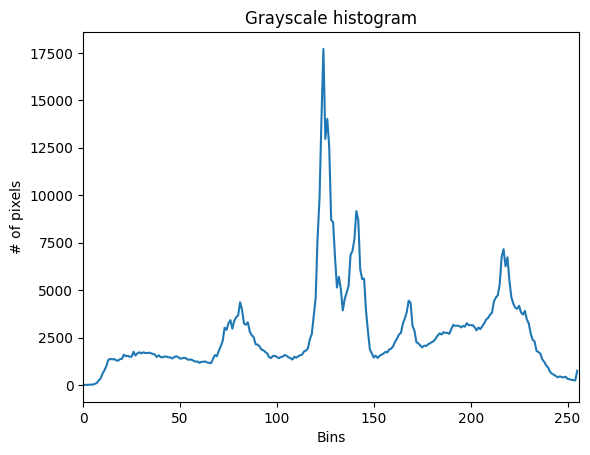

In [10]:
hist = cv.calcHist([image] , [0], None, [256] , [0,256])
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

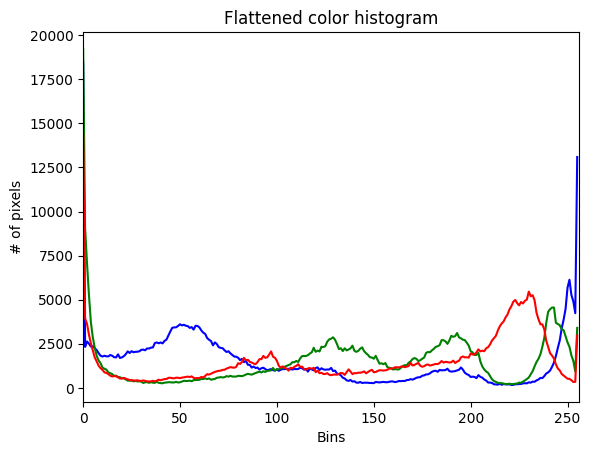

In [11]:
image = cv.imread("../DATA/colors.jpg")
chans = cv.split(image)
colors = ("b", "g" , "r")
plt.figure()
plt.title("Flattened color histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0],None, [256] , [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])

### Smoothing and blurring

In [14]:
image = cv.imread("../DATA/colors.jpg")
blurred = np.hstack(
    [
        cv.blur(image, (3,3)),
        cv.blur(image, (5,5)),
        cv.blur(image, (7,7))
    ]
)
cv.imshow("Blurred" , blurred)
cv.waitKey(0)

113

In [16]:
blurred = np.hstack(
    [
        cv.medianBlur(image, 3),
        cv.medianBlur(image, 5),
        cv.medianBlur(image, 7)
        
        
    ]
)
cv.imshow("Median Blurred" , blurred)
cv.waitKey(0)

113